In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [71]:
data1 = pd.read_csv('data.csv' ) 
data1.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data1

,voltage,armature_current,ang_displacement,torque,ang_velocity,back_emf,status
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...
34688,12.0,-0.005713,399.050481,-0.001542,44.638628,12.052430,0
34689,12.0,-0.006821,399.302406,-0.001842,44.275862,11.954483,0
34690,12.0,0.014331,399.553063,0.003869,44.492931,12.013091,0
34691,12.0,-0.016004,399.841767,-0.004321,44.486497,12.011354,0


In [72]:
#data = shuffle(data)
#data.to_csv('shuffeled_data.csv', index = False)

In [3]:
data = pd.read_csv('shuffeled_data.csv' ) 
data

,voltage,armature_current,ang_displacement,torque,ang_velocity,back_emf,status
0,2.4,0.002526,46.598101,0.000682,8.916037,2.407330,1
1,12.0,0.016292,13.029970,0.004399,44.389868,11.985264,0
2,12.0,0.013671,2396.925120,0.003691,44.317572,11.965744,0
3,12.0,0.015346,2002.623232,0.004144,44.359918,11.977178,0
4,12.0,-0.015231,4257.821298,-0.004112,44.474120,12.008012,0
...,...,...,...,...,...,...,...
34688,12.0,-0.014184,351.061857,-0.003830,44.414168,11.991825,1
34689,4.8,-0.001287,50.761477,-0.000348,17.867315,4.824175,1
34690,12.0,-0.003176,3334.815543,-0.000857,44.667806,12.060308,0
34691,12.0,-0.010400,1959.403120,-0.002808,44.286077,11.957241,0


In [4]:
data.describe(include='all')

,voltage,armature_current,ang_displacement,torque,ang_velocity,back_emf,status
count,34693.000000,34693.000000,3.469300e+04,34693.000000,34693.000000,34693.000000,34693.000000
mean,10.879313,0.069830,1.187451e+03,0.018854,39.938196,10.783313,0.449947
std,2.644070,1.396780,1.365998e+03,0.377130,10.527710,2.842482,0.497496
min,0.000000,-4.262117,-1.856054e-27,-1.150772,0.000000,0.000000,0.000000
25%,12.000000,-0.010570,1.266231e+02,-0.002854,44.237611,11.944155,0.000000
50%,12.000000,0.000000,3.510119e+02,0.000000,44.388652,11.984936,0.000000
75%,12.000000,0.010361,2.220509e+03,0.002797,44.532364,12.023738,1.000000
max,12.000000,30.040013,4.399986e+03,8.110803,78.706628,21.250789,1.000000


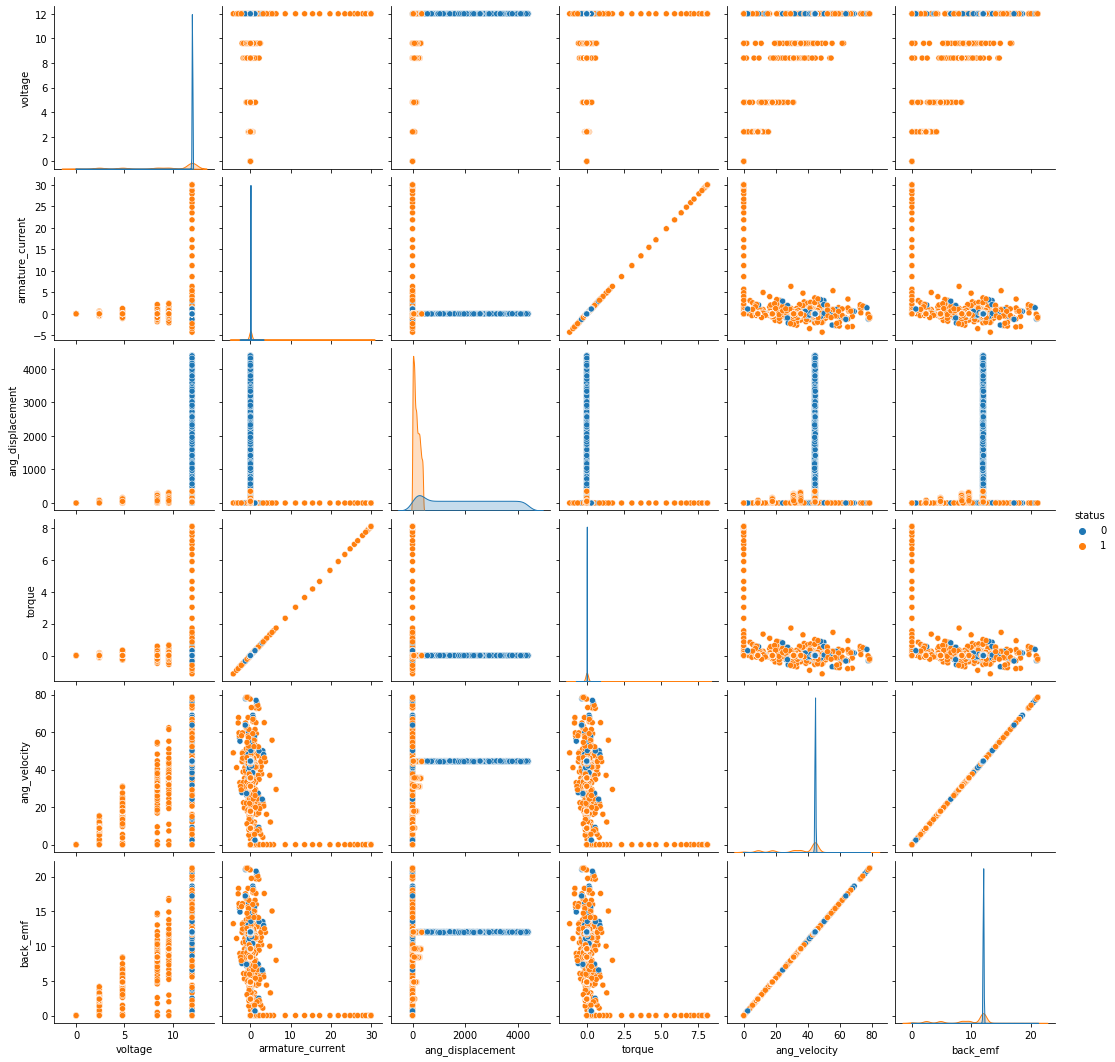

In [75]:
sns.pairplot(data, hue='status')

<AxesSubplot:>

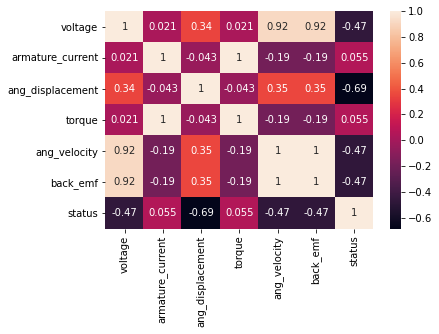

In [76]:
sns.heatmap(data.corr(), annot=True)

In [4]:
# creating input features and target variables
X= data.iloc[:,0:6]
y= data.iloc[:,6]
X.head(2)

,voltage,armature_current,ang_displacement,torque,ang_velocity,back_emf
0,2.4,0.002526,46.598101,0.000682,8.916037,2.407330
1,12.0,0.016292,13.029970,0.004399,44.389868,11.985264


In [5]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-3.2069627 , -0.04818584, -0.83519121, -0.04818584, -2.9467574 ,
        -2.9467574 ],
       [ 0.42385533, -0.03832956, -0.85976564, -0.03832956,  0.42285893,
         0.42285893],
       [ 0.42385533, -0.04020602,  0.88542723, -0.04020602,  0.41599159,
         0.41599159],
       ...,
       [ 0.42385533, -0.05226764,  1.57203447, -0.05226764,  0.44925992,
         0.44925992],
       [ 0.42385533, -0.05743963,  0.56512779, -0.05743963,  0.41299993,
         0.41299993],
       [ 0.42385533, -0.0594534 , -0.45335109, -0.0594534 ,  0.44181723,
         0.44181723]])

In [6]:
%store X
%store y

Stored 'X' (ndarray)
Stored 'y' (Series)


In [80]:
df = pd.DataFrame(X, columns=['voltage', 'current' ,'displacement','torque','velocity','bemf'])

In [81]:
df.describe(include='all')

,voltage,current,displacement,torque,velocity,bemf
count,3.469300e+04,3.469300e+04,3.469300e+04,3.469300e+04,3.469300e+04,3.469300e+04
mean,1.290551e-16,5.939452e-18,6.492435e-17,1.638469e-18,-1.976916e-16,9.528724e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-4.114667e+00,-3.101427e+00,-8.693046e-01,-3.101427e+00,-3.793681e+00,-3.793681e+00
25%,4.238553e-01,-5.756177e-02,-7.766068e-01,-5.756177e-02,4.083962e-01,4.083962e-01
50%,4.238553e-01,-4.999397e-02,-6.123371e-01,-4.999397e-02,4.227434e-01,4.227434e-01
75%,4.238553e-01,-4.257602e-02,7.562773e-01,-4.257602e-02,4.363944e-01,4.363944e-01
max,4.238553e-01,2.145694e+01,2.351820e+00,2.145694e+01,3.682566e+00,3.682566e+00


In [ ]:
#You do not mention if mean values of the two data sets, so we cannot assume that their means are the same. Two data sets can have are very different mean values but have the same standard deviations. Therefore, the amount of variance (aka “noise”) in the two data sets is the same, even though the means differ.

#Here below is a graphical example, with different means and the same standard deviations: